# Grundlagen der Statistik
## für Informatiker
### Wolfgang Tröscher, SPE München
### Stand: 21.02.2024

In diesem Dokument soll gezeigt werden, wie wir die statischen Berechnungen, die in dem Skript ##Grundlagen der Statistik (für Informatiker)** mit Hilfe der Programmiersprache **Python** durchführen können. Ich gehe hier strikt nach den Kapiteln im Skript vor, sodass man leicht den gesuchten Python-Code finden sollte. auch die Kapitelnummern stimmen jeweils überein.

Als Datenstruktur verwende ich hier immer ein Numpy-Array.

# Kapitel 3: Deskriptive Statistik
## 3.1 Lageparameter

In [460]:
import numpy as np
x = np.array([3,5,7,10,15])

# Der Mittelwert
print(np.mean(x))

8.0


In [461]:
# Der Median
x = np.array([4,8,15,16,23,42])
print(np.median(x))

15.5


In [462]:
# Quantile
# Numpy bietet  hier mehrere Varianten für die Berechnung an:
# ‘inverted_cdf’
# ‘averaged_inverted_cdf’
# ‘closest_observation’
# ‘interpolated_inverted_cdf’
# ‘hazen’
# ‘weibull’
# ‘linear’ (default)
# ‘median_unbiased’
# ‘normal_unbiased’

# Wir berechnen für alle diese Mögichkeiten das 70%-Quantil
methods = ["inverted_cdf", "averaged_inverted_cdf", "closest_observation", "interpolated_inverted_cdf", "hazen", "weibull", "linear", "median_unbiased",
           "normal_unbiased"]

x = np.array([3,5,7,8,9,11,12,13,14,16,18])

for method in methods:
    print(f"Methode = {method}, Wert = {np.quantile(x, q = [0.7], method=method)}")

Methode = inverted_cdf, Wert = [13]
Methode = averaged_inverted_cdf, Wert = [13.]
Methode = closest_observation, Wert = [13]
Methode = interpolated_inverted_cdf, Wert = [12.7]
Methode = hazen, Wert = [13.2]
Methode = weibull, Wert = [13.4]
Methode = linear, Wert = [13.]
Methode = median_unbiased, Wert = [13.26666667]
Methode = normal_unbiased, Wert = [13.25]


In [463]:
# Modus
from scipy.stats import mode
x = np.array([4,1,2,4,3,4,2,5,2,3])
print(mode(x))

# Diese Funktion liefert im Falle, dass mehrere Zahlen mit der gleichen maximalen Häufigkeit vorkommen, nur eine (die kleinere) zurück.

ModeResult(mode=2, count=3)


## 3.2 Streuungsparameter

In [465]:
# Interquartilsabstand IQR
from scipy.stats import iqr
x = np.array([5,7,8,12,13,14,18,21,23,29])
print(iqr(x, interpolation="nearest"))

13


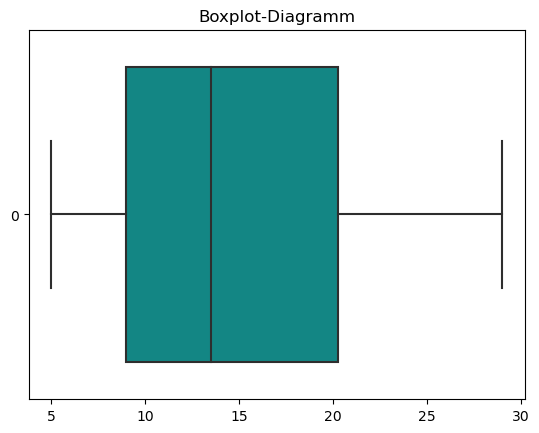

In [466]:
# Boxplot-Diagramme (hier mit Hilfe des Paktes seaborn)
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x, orient="h", color="#009997").set_title("Boxplot-Diagramm")
plt.show()

In [467]:
# Spannweite
x = np.array([5,7,8,12,13,14,18,21,23,29])
print(np.max(x) - np.min(x))

24


In [468]:
# Varianz
x = np.array([5,7,8,12,13,14,18,21,23,29])

# Der Population
print(f"Varianz der Population = {np.var(x)}")

# Der Stichprobe
print(f"Varianz der Stichprobe (df=n-1) = {np.var(x, ddof=1)}")

Varianz der Population = 53.2
Varianz der Stichprobe (df=n-1) = 59.111111111111114


In [469]:
# Standardabweichung
x = np.array([5,7,8,12,13,14,18,21,23,29])

# Der Population
print(f"Standardabweichung der Population = {np.std(x)}")

# Der Stichprobe
print(f"Standardabweichung der Stichprobe (df=n-1) = {np.std(x, ddof=1)}")

Standardabweichung der Population = 7.293833011524188
Standardabweichung der Stichprobe (df=n-1) = 7.688375063113864


In [470]:
# Kovarianz
x = np.array([3,5,9,13,17,25])
y = np.array([12,19,33,42,59,75])

# Der Population
print(f"Kovarianz der Population = {np.cov(x,y, ddof=0)[0,1]}")

# Der Stichprobe
print(f"Standardabweichung der Stichprobe (df=n-1) = {np.cov(x,y, ddof=1)[0,1]}")

Kovarianz der Population = 162.0
Standardabweichung der Stichprobe (df=n-1) = 194.4


In [471]:
# Variatioskoeffizient
from scipy.stats import variation
x1 = np.array([5,7,6,8,10])
x2 = np.array([50,70,60,80,100])

print(variation(x1))
print(variation(x2))

0.23895347964007296
0.23895347964007296


0.1883999999999999

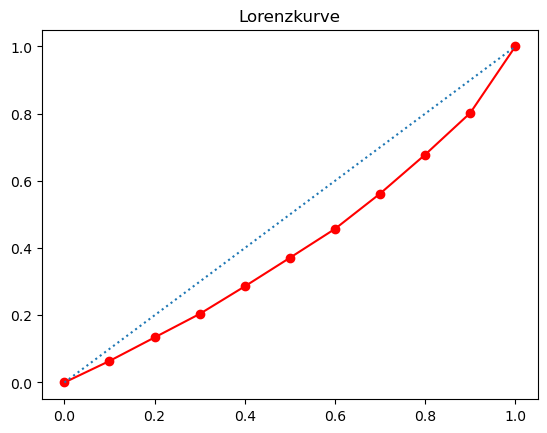

In [472]:
# Gini-Koeffizient
# Mir ist keine Implementierung zum Beispiel im Paket scipy bekannt. Daher hier eine eigene Implementierung der Funktion:
import matplotlib.pyplot as plt
def berechne_gini(daten, korrigiert=False, lorenz=False):
    """ Gibt den Gini-Koeffizienten zurueck
    Parameter: 
    daten (Liste)
    korrigiert=False (bei True wird der korrigierte Gini-Koeffizient
    zurueckgegeben)
    lorenz=False (bei True wird die Lorenzkurve geplottet)
    """
    if not isinstance(daten, list):
        raise TypeError("Daten muessen als Liste übergeben werden.")
    n = len(daten)
    s = sum(daten)
    daten.sort()
    
    summe_kumuliert = [daten[0]]
    for i in range(1,n):
        summe_kumuliert.append(summe_kumuliert[i-1] + daten[i])
    
    
    
    zaehler = 2 * sum([i * daten[i-1] for i in range(1,n+1)])
    nenner = n * s
    gini = zaehler / nenner - (n+1)/n
    
    if(lorenz):
        anteile_kumuliert = [x / s for x in summe_kumuliert]
        anteile_kumuliert.insert(0,0)  
        x = [i / n for i in range(n+1)]
        plt.plot(x,anteile_kumuliert, color="red", marker="o")
        plt.plot([0,1], [0,1], linestyle='dotted')
        plt.title("Lorenzkurve")
        plt.show
    
    return gini if not korrigiert else gini  * n/(n-1)


gehaelter =  [3200,3500,3500,4100,4250,4300,5250,5800,6200,9900]

berechne_gini(gehaelter, lorenz=True)

# Kapitel 6: Verteilungen
## 6.1 Diskrete Verteilungen
### 6.1.1 Binomialverteilung


In [474]:
# In einer Urne befinden sich 4 rote und 6 schwarze Kugeln. Wir ziehen 10 Mal mit Zurücklegen eine Kugel.
# Wie groß ist die Wahrscheinlichkeit, 5 Mal eine rote Kugel zu ziehen?

from scipy.stats import binom
print(binom.pmf(5,10,0.4))

0.20065812479999992


### 6.1.2 Hypergeometrische Verteilung

In [476]:
# Lotto (6 aus 49): Wahrscheinlichkeit für 3 Richtige
from scipy.stats import hypergeom
print(hypergeom.pmf(3,49,6,6))

0.017650403866870105


### 6.1.3 Poissonverteilung

In [478]:
# Ein radioaktives Element zerfällt mit Mittel mit 5 Zerfällen pro Sekunde. Wie groß ist die Wahrscheinlichkeit, dass genau 3 Teile zerfallen?

from scipy.stats import poisson
print(poisson.pmf(3, 5))

0.1403738958142805


## 6.2 Stetige Verteilungen
### 6.2.1 Normalverteilung

In [480]:
from scipy.stats import norm
# Körpergröße: Erwartungswert = 178,9cm, Standardabweichung = 8,5cm
# b) P(X<175cm)

print(norm.cdf(175, 178.9, 8.5))

# c) P(X>180cm)
print(1 - norm.cdf(180, 178.9, 8.5))

# d) P(170 <= X <= 180)
links = norm.cdf(170, 178.9, 8.5)
rechts = 1 - norm.cdf(180, 178.9, 8.5)
print(1-links-rechts)


0.32318044829413806
0.44851591953587056
0.40394785603164407


## 7.1 Konfidenzintervalle

In [482]:
# KI für den Intelligenzquotienten mit Stichprobengröße = 50, Stichprobenmittelwert = 103, Standardabweichung = 5
from scipy.stats import norm
# Wichtig: Für scale muss man hier den Standardfehler (Standardabweichung des Mittelwertes) angegen, nicht die Standardabweichung der Stichprobe!
print(norm.interval(.95, 103, 5/np.sqrt(50)))

(101.61409617565032, 104.38590382434968)


In [483]:
# KI für Zuckergehalt, Signifikanzniveau = 95%
x = np.array([12.8, 11.9, 10.1, 11.9, 10.8, 12.1, 12.3, 9.9, 11.7, 10.9])

from scipy.stats import t
from scipy.stats import sem

print(t.interval(.95, len(x)-1, x.mean(), sem(x)))

(10.749558075797859, 12.130441924202144)


### Konfidenzintervall für Anteilswerte

In [485]:
# Umfrage unter 100 Personen, 21 davon gaben an, eine bestimmte Partei zu wählen.
# Berechne den KI für alpha=0.10

from statsmodels.stats.proportion import proportion_confint
print(proportion_confint(count=21, nobs=100, alpha=.1, method="normal"))

(0.14300375689380565, 0.2769962431061943)


## 7.2 Hypothesentest
### 7.2.1 t-Test

In [487]:
# Einstichproben-t-Test, zweiseitig

# Zuckergehalt: H0: mü = 12%, H1: mü <> 12%
from scipy.stats import ttest_1samp
x = np.array([12.8, 11.9, 10.1, 11.9, 10.8, 12.1, 12.3, 9.9, 11.7, 10.9])

print(ttest_1samp(x, popmean=12))

TtestResult(statistic=-1.8347785189881753, pvalue=0.0997357600099662, df=9)


In [488]:
# Einstichproben-t-Test, einseitig
# H0: mü >= 100g, H1: mü < 100g
n = 20
x_quer = 99.4
s = 0.3

# Erstelle Zufallszahlen, die dem angegebenen Kennzahlen entsprechen
x = np.random.normal(loc=x_quer, scale=s, size=n)
print(ttest_1samp(x, popmean=100, alternative="less"))

TtestResult(statistic=-7.8557749608246565, pvalue=1.0967836211208878e-07, df=19)


In [489]:
# Zweistichproben-t-Test (unverbunden)
# Gedächtnistest bei zwei Schulklassen

klasse1 = np.random.normal(loc=65.8, scale=7.9, size=23)
klasse2 = np.random.normal(loc=62.7, scale=5.8, size=22)

#F-Test
from scipy.stats import f
f_emp = 7.9**2 / 5.8**2
print(f"Emp. F-Wert = {f_emp}")
print(f"Kritischer F-Wert = {f.isf(.05, len(klasse1)-1, len(klasse2)-1)}")

from scipy.stats import ttest_ind
print(ttest_ind(klasse1, klasse2))

Emp. F-Wert = 1.8552318668252081
Kritischer F-Wert = 2.073309399374337
TtestResult(statistic=1.8555674805297306, pvalue=0.07037796756373794, df=43.0)


In [490]:
# Zweistichproben-t-Test (verbunden)
from scipy.stats import ttest_rel

x1 = np.array([159,181,165,160,175,181])
x2 = np.array([145,170,165,140,155,182])

print(ttest_rel(x1, x2))

TtestResult(statistic=2.8001312592292362, pvalue=0.03798773947333919, df=5)


### 7.2.3 $\chi^2$-Test

In [492]:
## Unbhängigkeitstest
from scipy.stats import chi2_contingency
obs = np.array([[12,23,11], [17,27,19], [19,19,33]])
print(obs)

print(chi2_contingency(obs))


[[12 23 11]
 [17 27 19]
 [19 19 33]]
Chi2ContingencyResult(statistic=9.169027276148263, pvalue=0.05701070094169602, dof=4, expected_freq=array([[12.26666667, 17.63333333, 16.1       ],
       [16.8       , 24.15      , 22.05      ],
       [18.93333333, 27.21666667, 24.85      ]]))


### 7.2.4 Lineare Regression


In [494]:
import pandas as pd
from statsmodels.formula.api import ols

x = np.array([21,30,35,42,70,75])
y = np.array([600,850,1200,1300,1990,2100])

df = pd.DataFrame({"X" : x, "Y":y})
model = ols("y~x", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     195.3
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           0.000152
Time:                        10:28:57   Log-Likelihood:                -34.637
No. Observations:                   6   AIC:                             73.27
Df Residuals:                       4   BIC:                             72.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.9581     96.089      1.165      0.3

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<Axes: >

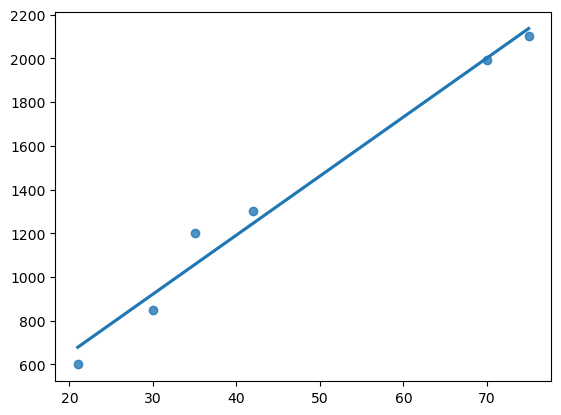

In [495]:
# Regressionsgerade zeichnen
import seaborn as sns
sns.regplot(x=x,y=y, ci=None)

### 7.2.6 Rangkorrelationskoeffizient nach Spearman


In [497]:
# Ränge ermitteln
from scipy.stats import rankdata
zeiten = np.array([9.58, 9.71, 9.84, 9.93, 9.93, 10, 10, 10.34])

print(rankdata(zeiten))

[1.  2.  3.  4.5 4.5 6.5 6.5 8. ]


In [528]:
# Berechnung des Korrelationskoeffizienten: Zusammenhang Vorbereitungszeit und Klausurergebnis
from scipy.stats import spearmanr

zeiten = np.array([21,22,15,16,8,1])
punkte = np.array([98,87,89,71,65,30])

print(spearmanr(zeiten, punkte))


SignificanceResult(statistic=0.7142857142857143, pvalue=0.1107871720116617)


## 7.4 Nichtparametrische Tests
### 7.4.1 Mann-Whitney-Test

In [552]:
## Reaktionsgeschwindigkeit zwischen den Geschlechtern
from scipy.stats import mannwhitneyu

maenner = np.array([47,47,51,57,77,85,86,89])
frauen = np.array([61,67,69,69,84,89,90])

print(mannwhitneyu(maenner, frauen))

MannwhitneyuResult(statistic=19.5, pvalue=0.35324679686204175)


### 7.4.2 Kruskal-Wallis-Test

In [559]:
## Zusammenhang Anzahl besuchter Vorlesungen und Klausurergebnis
from scipy.stats import kruskal


bwl = np.array([5,7,8,11,19])
it = np.array([8,10,14,15,16,18])
physik = np.array([6,12,12,17,20,21])

print(kruskal(bwl,it,physik))

KruskalResult(statistic=2.52612612612612, pvalue=0.28278650564234037)
